# Right_knee(SA)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model ,models, layers, optimizers, utils
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf           
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model

In [2]:
tf.__version__
# shap.__version__

'2.9.0'

In [3]:
#GPU 용량 할당시키기 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 2 GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3000)]) # limit in megabytes
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
sheet = pd.read_csv(r'AII_normal_patime2.csv', index_col = 0)
sheet = sheet.dropna()


from sklearn.preprocessing import MinMaxScaler, StandardScaler,Normalizer,MaxAbsScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = MaxAbsScaler()
scaler = StandardScaler()
# scalar = Normalizer()

In [5]:
angle = "right_knee_angle"

In [6]:
number = sheet[["num", angle]]

In [7]:
num = number["num"]
num = np.array(num)
num = list(dict.fromkeys(num))
number["right_knee_angle"].describe()

count    14916.000000
mean       163.299831
std         16.965639
min         70.759518
25%        154.953642
50%        169.885481
75%        175.190312
max        179.999212
Name: right_knee_angle, dtype: float64

In [8]:
number

,num,right_knee_angle
2,1,158.357806
3,1,156.124311
4,1,164.804143
6,1,171.816779
7,1,175.486067
...,...,...
14983,30,166.042223
14984,30,161.299881
14985,30,156.753795
14986,30,154.267144


In [9]:
# plt.figure(figsize = (4,8))
# sns.boxplot(y = number.right_knee_angle)

# Train

In [11]:
train_num = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,26,27,28,29,30]

In [12]:
# epochs = 100
# batch =32
# lr = 0.001

In [13]:
# lstm_ae = models.Sequential()
# # Encoder
# lstm_ae.add(layers.LSTM(64, activation='relu', input_shape=(1000, 1), return_sequences=True))
# lstm_ae.add(tf.keras.layers.Dropout(rate=0.2))
# lstm_ae.add(layers.LSTM(32, activation='relu', return_sequences=False))
# lstm_ae.add(layers.RepeatVector(1))

# # Decoder
# lstm_ae.add(layers.LSTM(32, activation='relu', return_sequences=True))
# lstm_ae.add(tf.keras.layers.Dropout(rate=0.2))
# lstm_ae.add(layers.LSTM(64, activation='relu', return_sequences=True))
# lstm_ae.add(layers.TimeDistributed(layers.Dense(1)))

# lstm_ae.summary()

In [14]:
# for i in train_num:
#     number_num = number[number["num"]== i].dropna()
#     number_num = number_num[[angle]]
#     # print("train_video : ",i,number_num)
#     number_num = scaler.fit_transform(number_num)
#     number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    
#     lstm_ae.compile(loss='mse', optimizer=optimizers.Adam(lr))
#     history = lstm_ae.fit(number_num, number_num, epochs=epochs, batch_size=batch)
# #     print("number",i)
        
# #     plt.plot(history.history['loss'], label='train loss')
# #     plt.legend()
# #     plt.xlabel('Epoch'); plt.ylabel('loss')
# #     plt.show()

# Pridict

In [13]:
# lstm_ae = models.load_model("lstm_ae_right_knee.h5")
lstm_ae = tf.keras.models.load_model("lstm_ae_right_knee(100_32_4_64_0.1).h5")
lstm_ae.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1000, 64)          16896     
                                                                 
 dropout (Dropout)           (None, 1000, 64)          0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 repeat_vector (RepeatVector  (None, 1, 32)            0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 32)             8320      
                                                                 
 dropout_1 (Dropout)         (None, 1, 32)             0         
                                                        

number :  1
10/10 [==============================] - 0s 4ms/step
(303,)


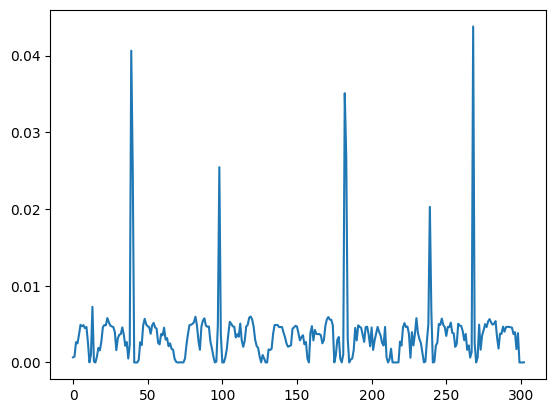

Reconstruction error threshold: 0.043793233399414724
number :  2
16/16 [==============================] - 0s 5ms/step
(504,)


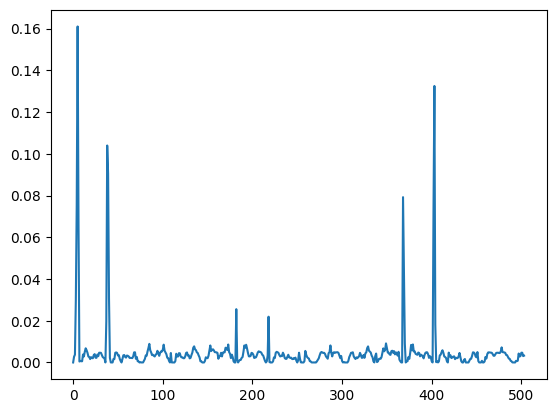

Reconstruction error threshold: 0.16104056494684754
number :  3
17/17 [==============================] - 0s 4ms/step
(535,)


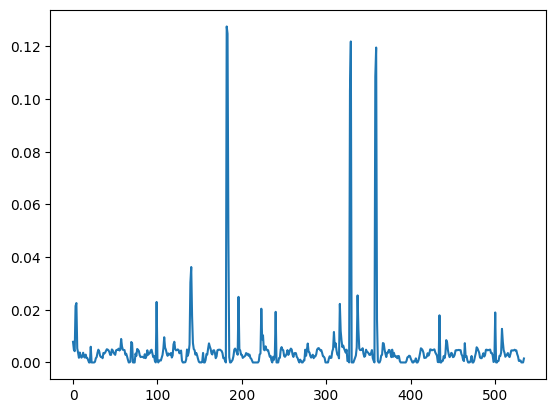

Reconstruction error threshold: 0.12751599217489337
number :  4
23/23 [==============================] - 0s 4ms/step
(717,)


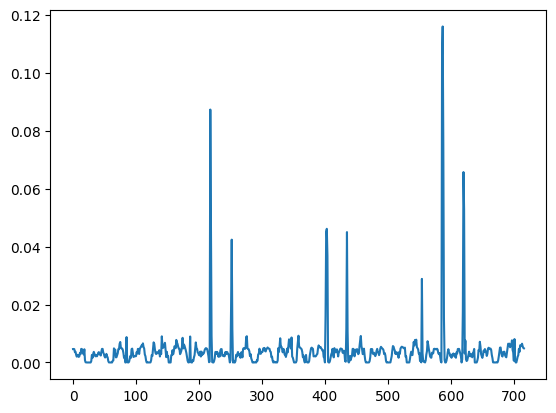

Reconstruction error threshold: 0.11599768189992764
number :  5
24/24 [==============================] - 0s 4ms/step
(741,)


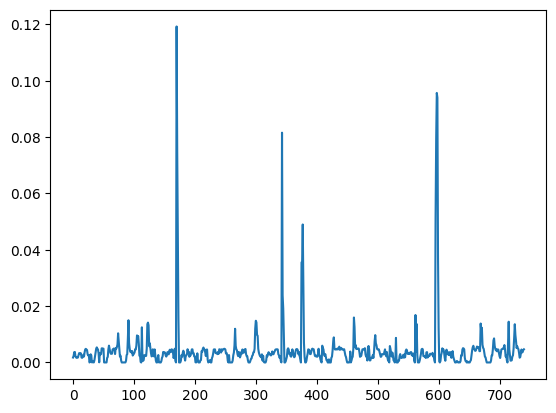

Reconstruction error threshold: 0.11929607677620528
number :  6
27/27 [==============================] - 0s 4ms/step
(853,)


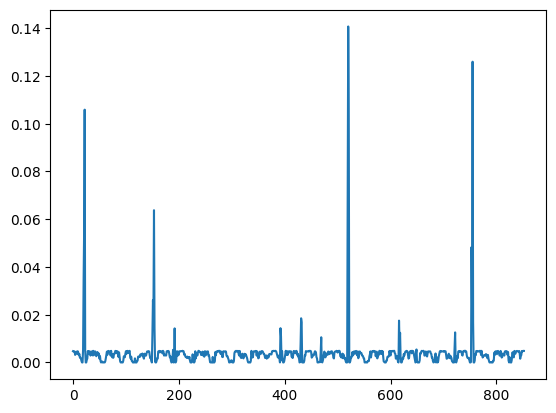

Reconstruction error threshold: 0.14074563598785272
number :  7
27/27 [==============================] - 0s 4ms/step
(845,)


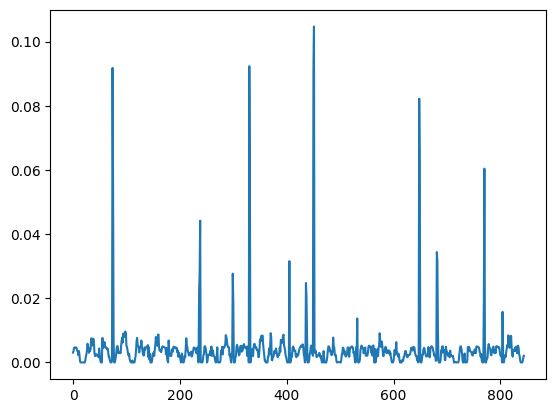

Reconstruction error threshold: 0.10471344736132439
number :  8
25/25 [==============================] - 0s 4ms/step
(773,)


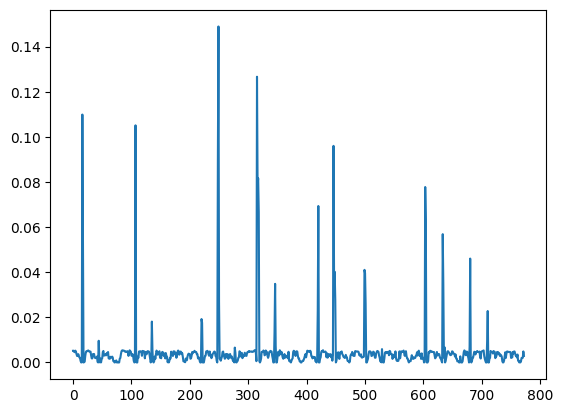

Reconstruction error threshold: 0.14891007658407904
number :  9
21/21 [==============================] - 0s 4ms/step
(655,)


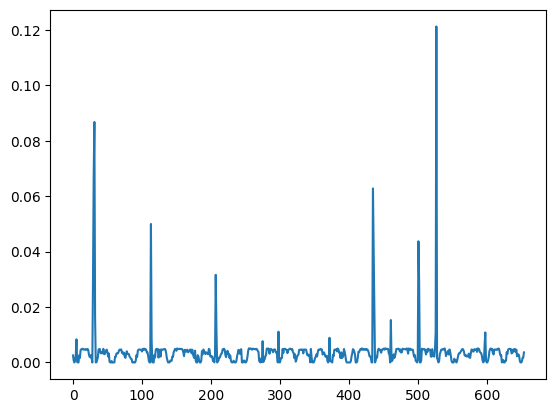

Reconstruction error threshold: 0.12125266046605285
number :  10
18/18 [==============================] - 0s 4ms/step
(557,)


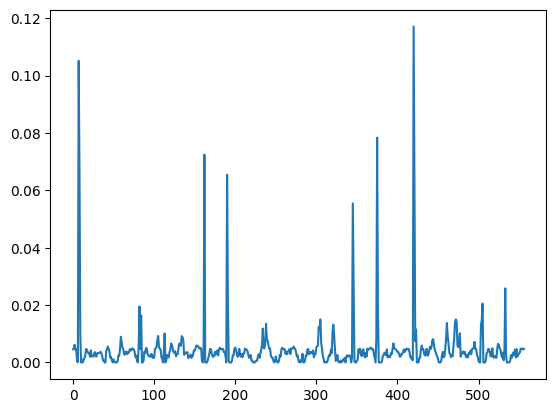

Reconstruction error threshold: 0.1171136329757948
number :  11
25/25 [==============================] - 0s 4ms/step
(777,)


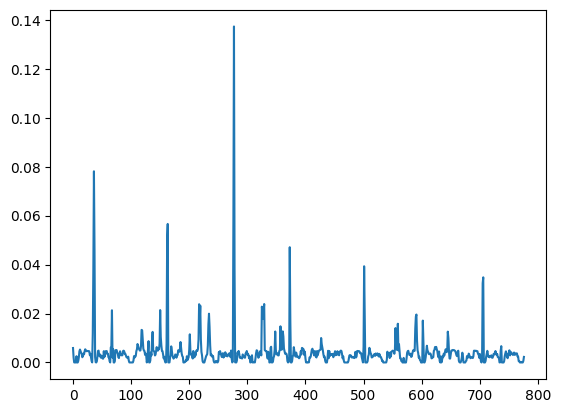

Reconstruction error threshold: 0.1373255248569316
number :  12
24/24 [==============================] - 0s 4ms/step
(757,)


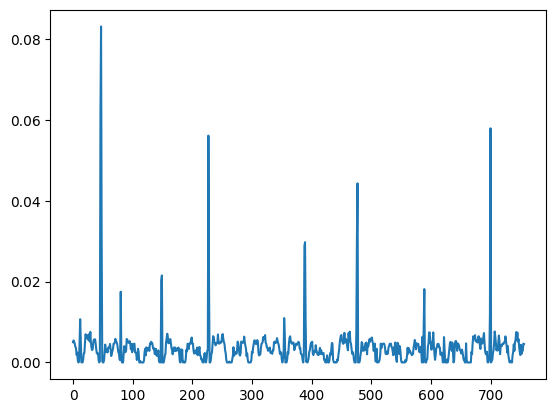

Reconstruction error threshold: 0.08315440594643032
number :  13
19/19 [==============================] - 0s 4ms/step
(578,)


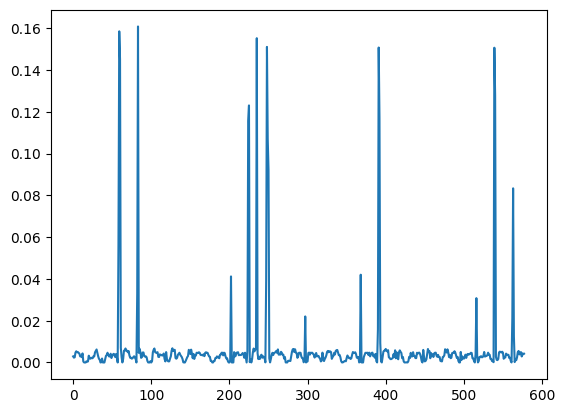

Reconstruction error threshold: 0.16088440175539373
number :  14
9/9 [==============================] - 0s 4ms/step
(280,)


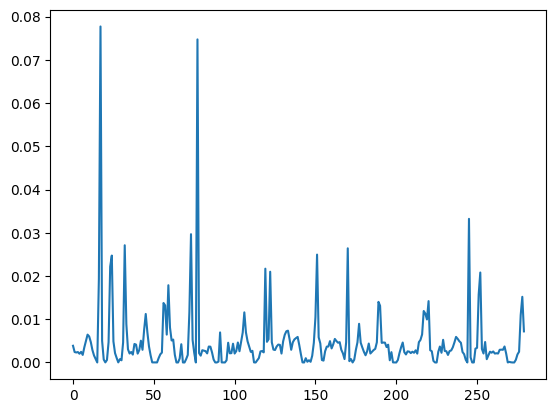

Reconstruction error threshold: 0.07770926425147819
number :  15
15/15 [==============================] - 0s 4ms/step
(463,)


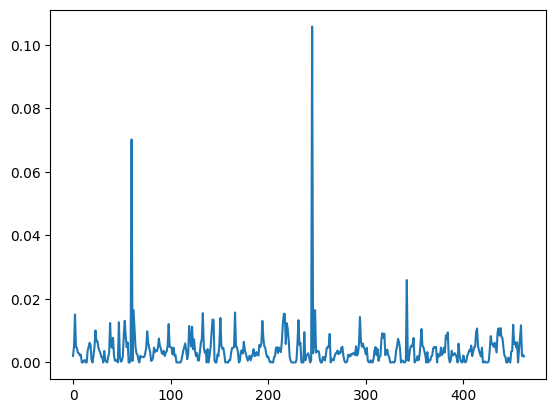

Reconstruction error threshold: 0.10577851811467044
number :  16
11/11 [==============================] - 0s 4ms/step
(327,)


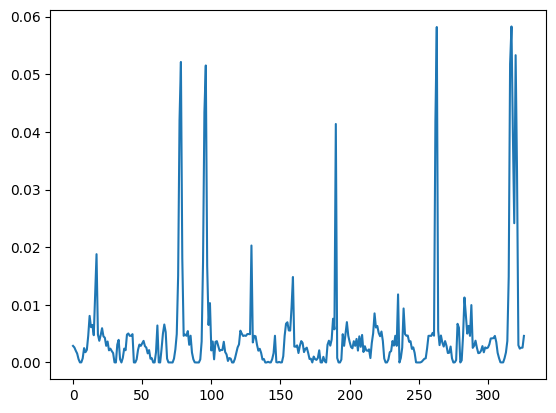

Reconstruction error threshold: 0.058283406872028924
number :  18
20/20 [==============================] - 0s 4ms/step
(623,)


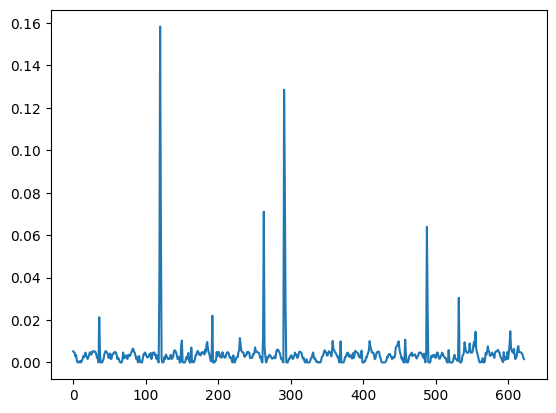

Reconstruction error threshold: 0.15834451947134512
number :  19
14/14 [==============================] - 0s 4ms/step
(441,)


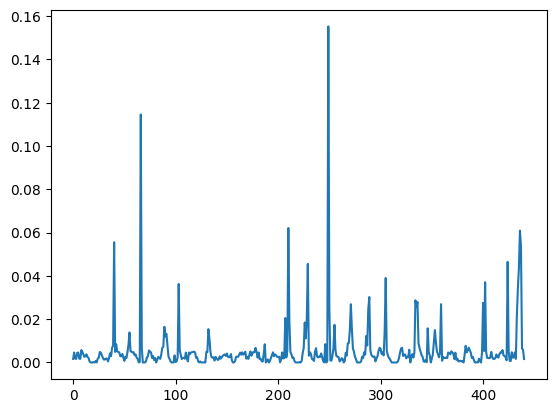

Reconstruction error threshold: 0.15524210165617958
number :  20
18/18 [==============================] - 0s 4ms/step
(567,)


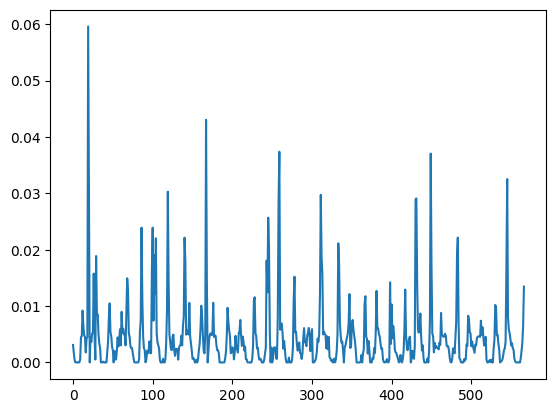

Reconstruction error threshold: 0.05959796815144763
number :  21
18/18 [==============================] - 0s 4ms/step
(553,)


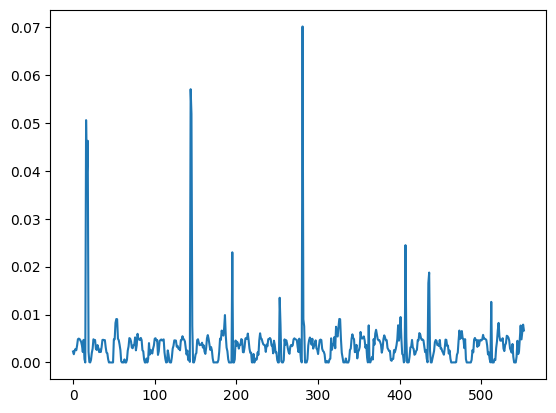

Reconstruction error threshold: 0.07011705951441496
number :  22
7/7 [==============================] - 0s 4ms/step
(207,)


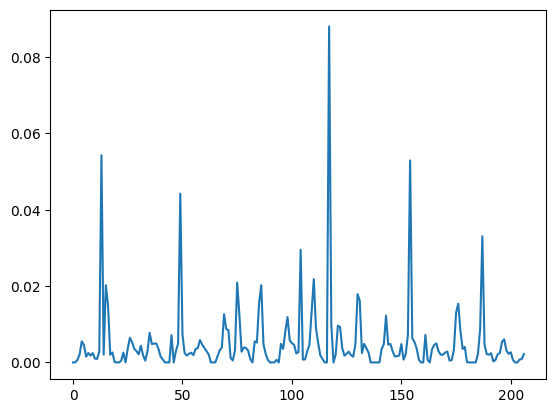

Reconstruction error threshold: 0.08795841408574502
number :  26
15/15 [==============================] - 0s 4ms/step
(457,)


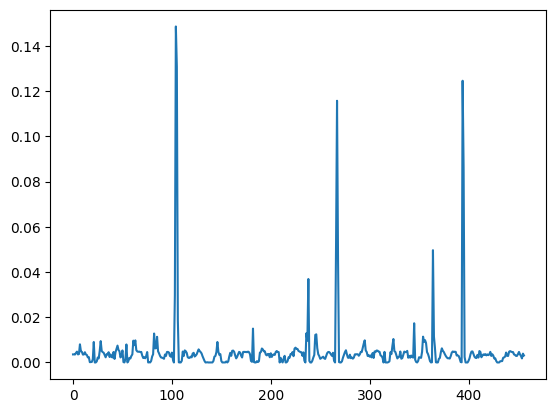

Reconstruction error threshold: 0.1486544329098958
number :  27
8/8 [==============================] - 0s 4ms/step
(240,)


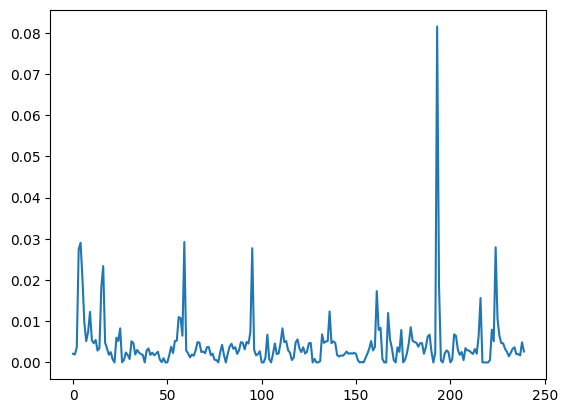

Reconstruction error threshold: 0.0815388407937883
number :  28
7/7 [==============================] - 0s 5ms/step
(199,)


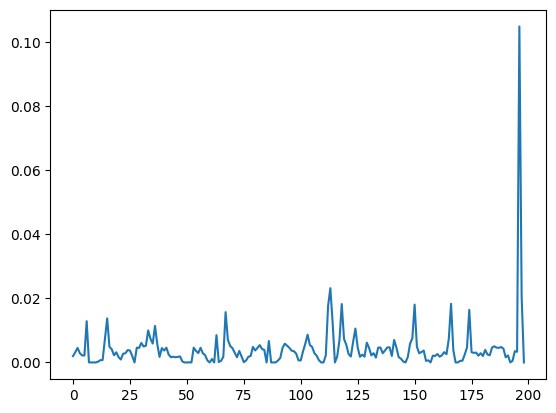

Reconstruction error threshold: 0.1048280882301747
number :  29
7/7 [==============================] - 0s 4ms/step
(197,)


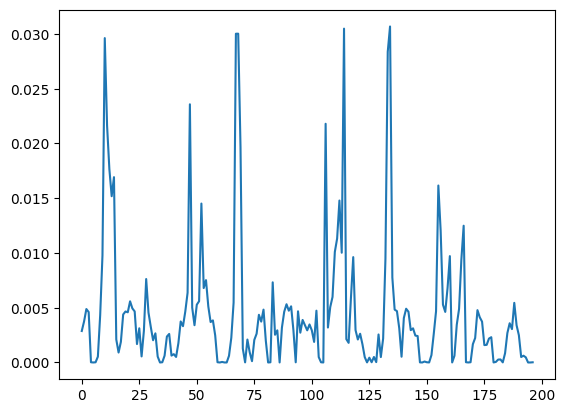

Reconstruction error threshold: 0.030686681768876494
number :  30
3/3 [==============================] - 0s 5ms/step
(70,)


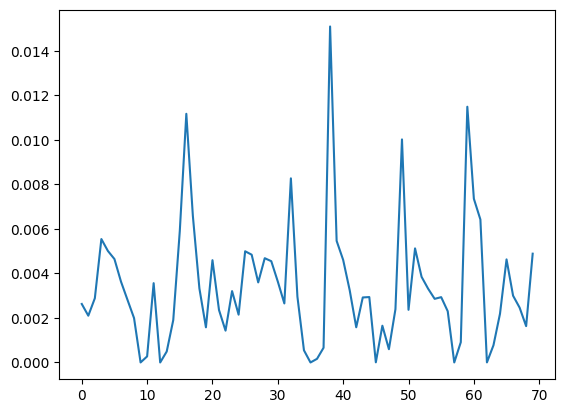

Reconstruction error threshold: 0.015098533906477994


In [17]:
threshold = []

for i in train_num:
    number_num = number[number["num"]== i].dropna()
    print("number : ",i)
    number_num = number_num[[angle]]
    number_num = scaler.fit_transform(number_num)
    number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    
    train_x_predictions = lstm_ae.predict(number_num)
    train_mae_loss = np.mean(np.power(train_x_predictions - number_num,2), axis=1)
    train_mae_loss = train_mae_loss.flatten()
    
    print(train_mae_loss.shape)
    plt.plot(train_mae_loss)
    plt.show()
    
    train_mae_loss_max = np.max(train_mae_loss)
    threshold.append(train_mae_loss_max )
    
    print(f'Reconstruction error threshold: {train_mae_loss_max }')

In [18]:
# 임계값 설정
threshold_ave = np.mean(threshold)
threshold_ave

0.10521466018683354

In [35]:
# print(epochs,"/" , lr ,"/",  threshold_ave)

=========================================================

In [19]:
sar_csv = os.listdir("test/sar_long_in/")
print(len(sar_csv))
cont = 0

64


In [37]:
# for i in sar_csv:
#     path = "test/sar_long_in/"+str(i)
#     print("patient_number : ",i)
#     test_sheet = pd.read_csv(path, index_col = 0).dropna()
#     test_num = test_sheet[[angle]]
#     test_num = scaler.fit_transform(test_num)
#     test = np.reshape(test_num,(test_num.shape[0],1,1))
#     test_x_predictions = lstm_ae.predict(test)
#     test_mae_loss = np.mean(np.power(test_x_predictions - test,2), axis=1).flatten()
    
#     real_a_point = test_sheet['tick']
#     real_a_point_list = real_a_point.to_numpy().astype(int)

    # print(len(real_a_point_list))
    # print(len(test_mae_loss))

#     plt.figure(figsize = (20,3))
#     plt.plot(test_mae_loss)
#     plt.axhline(y=threshold_ave, color='red', linewidth=2)
            

#     red = 0
#     for i in range(len(real_a_point_list)):
#         if test_mae_loss[i] >= threshold_ave:
#             plt.scatter(i, test_mae_loss[i],c='r')
#             red = 1
            
#     if red == 1:
#         cont += 1

    # plt.grid()
    # plt.show()
    
    # loss_max = np.max(test_mae_loss)
    # print(f'Reconstruction error threshold: {loss_max}')
    


# SA TEST

-Patient_number :  03.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 142
-max_anomaly :  0.15929548726896467
-min_anomaly :  0.14812590437726106
-Anomaly Area : 0.3086796389691402
-Reconstruction error threshold : 0.15929548726896467
-Anomaly points: 3


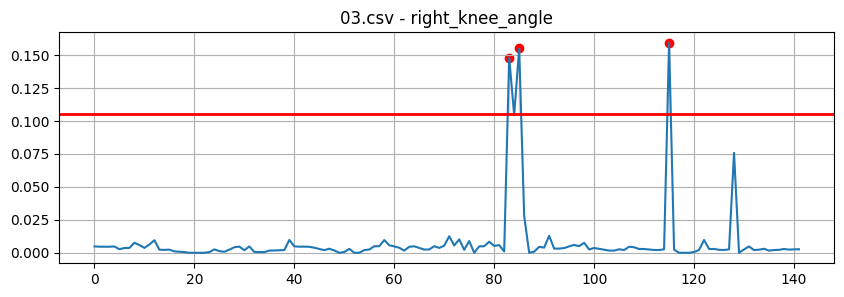

-Patient_number :  07.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 129
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.06290491861938628
-Anomaly points: 0


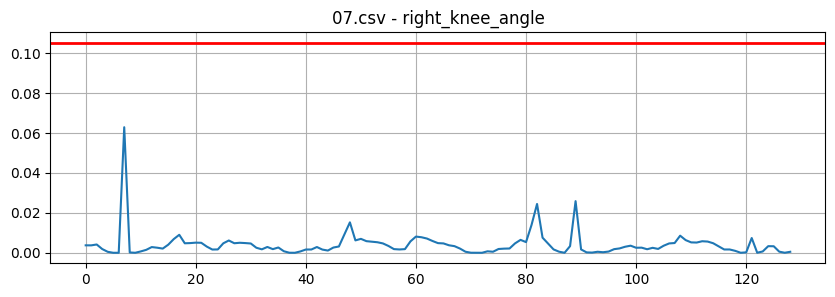

-Patient_number :  115.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 110
-max_anomaly :  0.1142366403825355
-min_anomaly :  0.11217183586690241
-Anomaly Area : 0.11320423812471896
-Reconstruction error threshold : 0.1142366403825355
-Anomaly points: 2


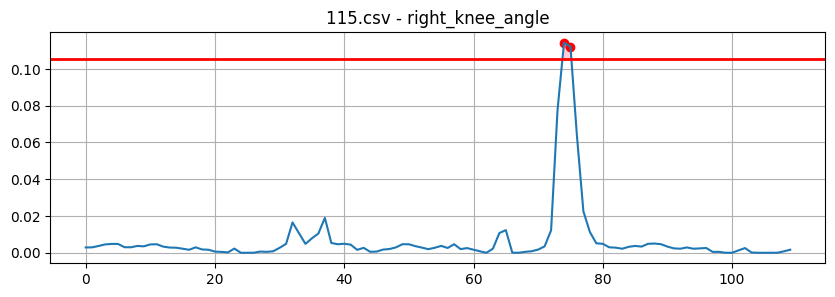

-Patient_number :  120.csv
8/8 [==============================] - 0s 5ms/step
-Data len : 249
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.036678872334392126
-Anomaly points: 0


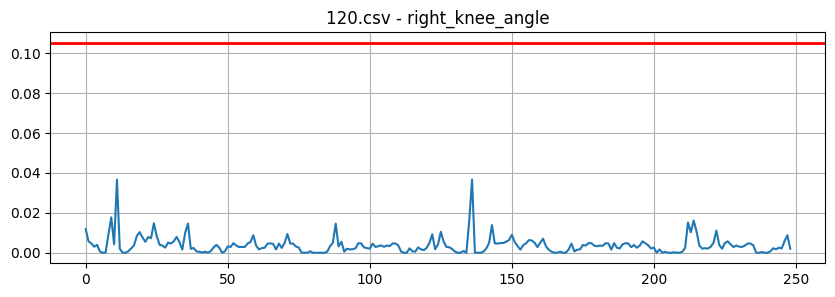

-Patient_number :  123.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 157
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.10880166556644524
-Anomaly points: 1


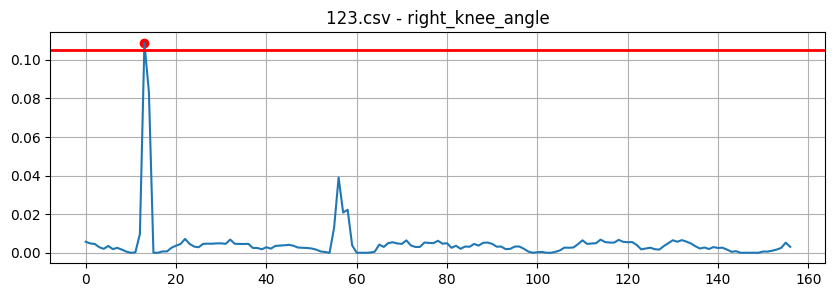

-Patient_number :  141.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 176
-max_anomaly :  0.15575742993479053
-min_anomaly :  0.10552348473510442
-Anomaly Area : 0.24024793334380135
-Reconstruction error threshold : 0.15575742993479053
-Anomaly points: 3


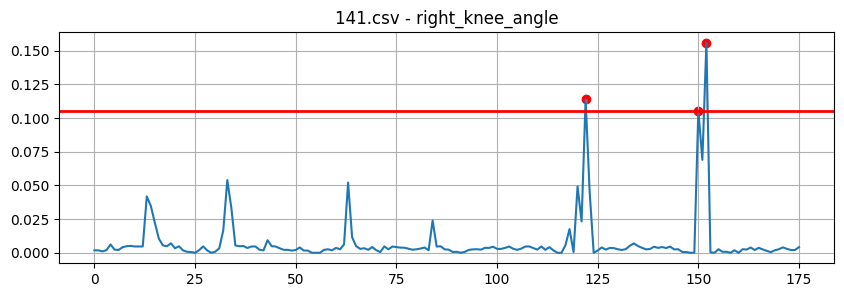

-Patient_number :  143.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 178
-max_anomaly :  0.1299071388419294
-min_anomaly :  0.1106286767378928
-Anomaly Area : 0.12026790778991109
-Reconstruction error threshold : 0.1299071388419294
-Anomaly points: 2


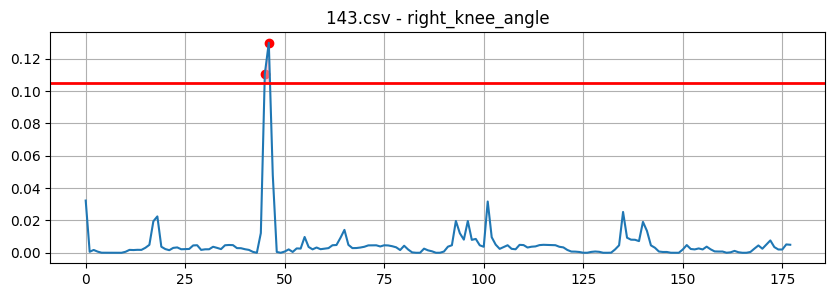

-Patient_number :  151.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 239
-max_anomaly :  0.1620454436696931
-min_anomaly :  0.11035260403876929
-Anomaly Area : 0.4560874785423836
-Reconstruction error threshold : 0.1620454436696931
-Anomaly points: 4


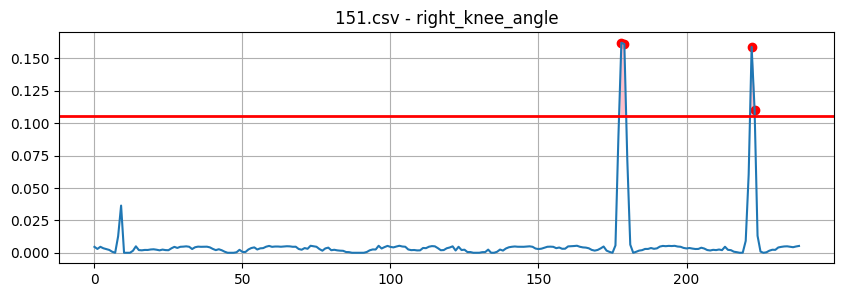

-Patient_number :  154.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 230
-max_anomaly :  0.16127726868044318
-min_anomaly :  0.13248869754484605
-Anomaly Area : 0.283890276468148
-Reconstruction error threshold : 0.16127726868044318
-Anomaly points: 3


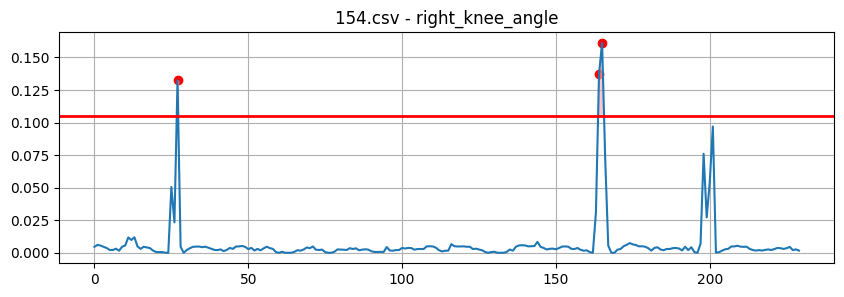

-Patient_number :  166.csv
7/7 [==============================] - 0s 5ms/step
-Data len : 202
-max_anomaly :  0.16195172373729516
-min_anomaly :  0.16046124282886887
-Anomaly Area : 0.161206483283082
-Reconstruction error threshold : 0.16195172373729516
-Anomaly points: 2


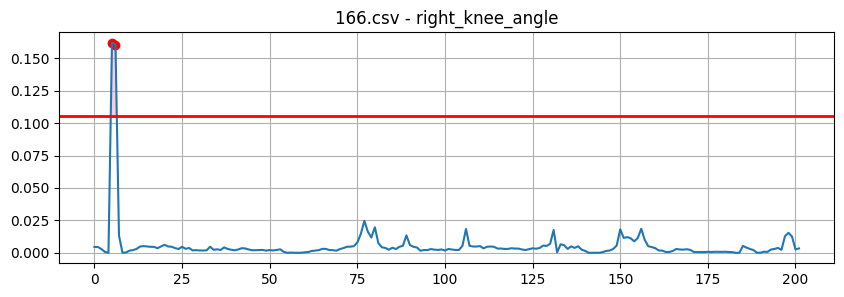

-Patient_number :  178.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 233
-max_anomaly :  0.16068044323416728
-min_anomaly :  0.1062356734389489
-Anomaly Area : 0.5078287899690518
-Reconstruction error threshold : 0.16068044323416728
-Anomaly points: 5


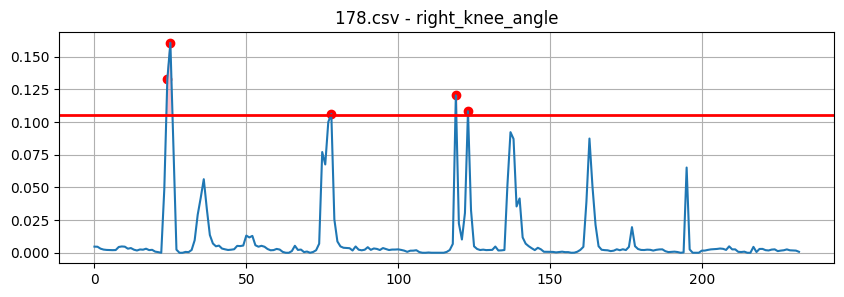

-Patient_number :  189.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 186
-max_anomaly :  0.15495576221544952
-min_anomaly :  0.12189301967005248
-Anomaly Area : 0.28316379648659096
-Reconstruction error threshold : 0.15495576221544952
-Anomaly points: 3


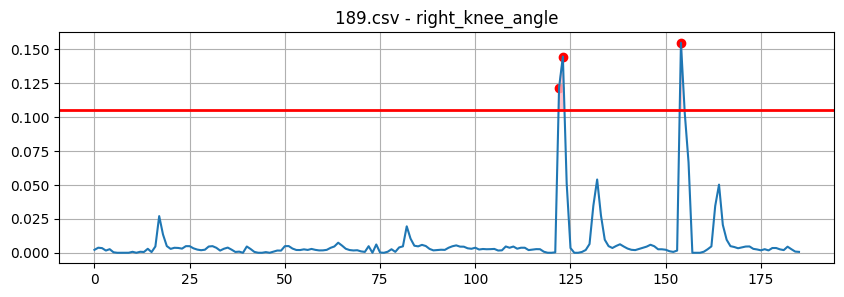

-Patient_number :  195.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 108
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.043655071667541075
-Anomaly points: 0


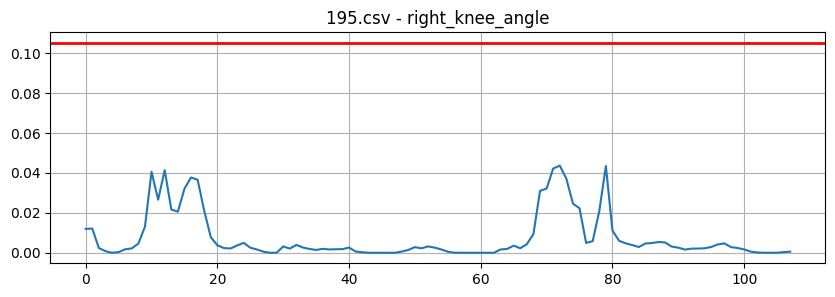

-Patient_number :  198.csv
7/7 [==============================] - 0s 5ms/step
-Data len : 207
-max_anomaly :  0.16088056744244433
-min_anomaly :  0.11350181288510258
-Anomaly Area : 0.5749190048051895
-Reconstruction error threshold : 0.16088056744244433
-Anomaly points: 5


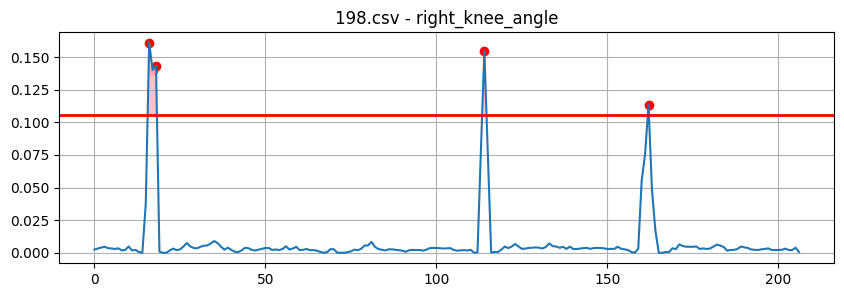

-Patient_number :  199.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 210
-max_anomaly :  1.12610320472575
-min_anomaly :  0.13475108002331881
-Anomaly Area : 0.7723588609780057
-Reconstruction error threshold : 1.12610320472575
-Anomaly points: 3


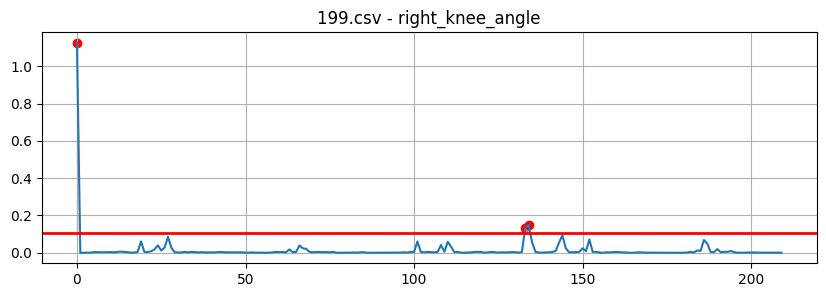

-Patient_number :  206.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 227
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.11492469612641515
-Anomaly points: 1


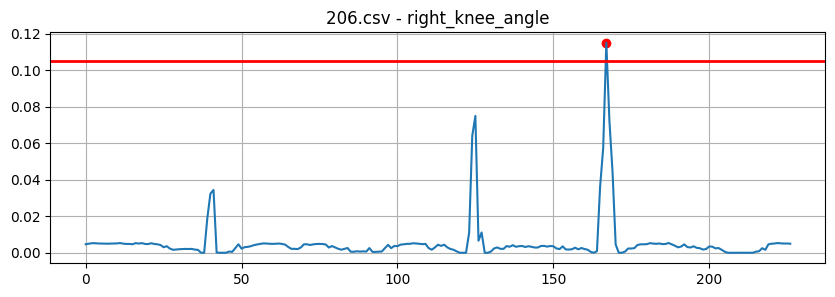

-Patient_number :  208.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 182
-max_anomaly :  0.13858585987647223
-min_anomaly :  0.109336396564673
-Anomaly Area : 0.12396112822057262
-Reconstruction error threshold : 0.13858585987647223
-Anomaly points: 2


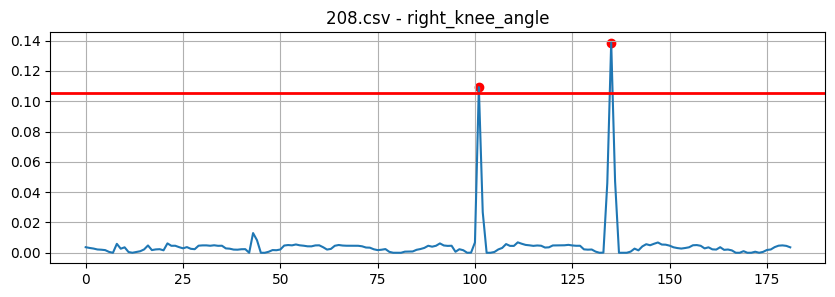

-Patient_number :  209.csv
4/4 [==============================] - 0s 5ms/step
-Data len : 126
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.018309768365206466
-Anomaly points: 0


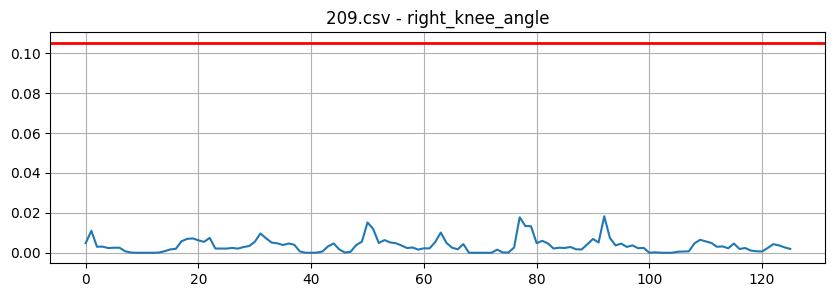

-Patient_number :  216.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 111
-max_anomaly :  0.136383412060811
-min_anomaly :  0.12511625790772266
-Anomaly Area : 0.26349944801695346
-Reconstruction error threshold : 0.136383412060811
-Anomaly points: 3


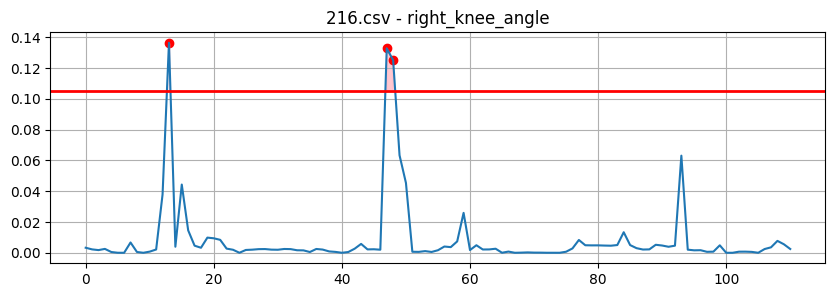

-Patient_number :  23.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 146
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.059772772676906616
-Anomaly points: 0


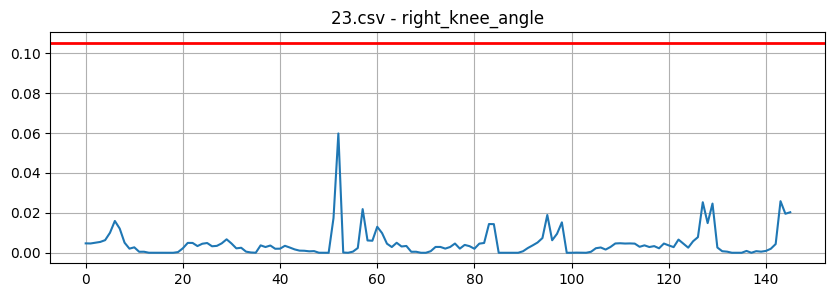

-Patient_number :  230.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 229
-max_anomaly :  0.16925008334337138
-min_anomaly :  0.10794980720590279
-Anomaly Area : 0.44372656669382543
-Reconstruction error threshold : 0.16925008334337138
-Anomaly points: 4


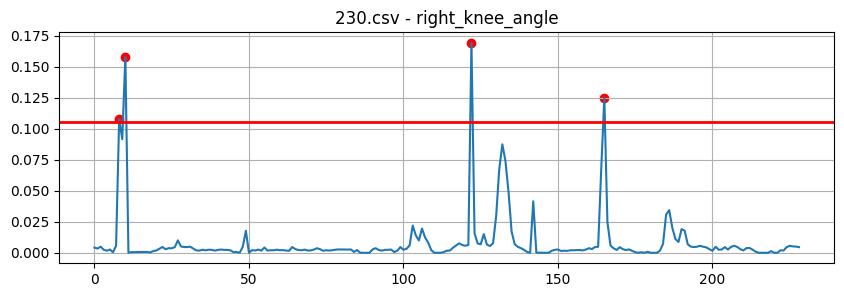

-Patient_number :  244.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 198
-max_anomaly :  0.1579323313528788
-min_anomaly :  0.12112451834289883
-Anomaly Area : 0.42765661688211365
-Reconstruction error threshold : 0.1579323313528788
-Anomaly points: 4


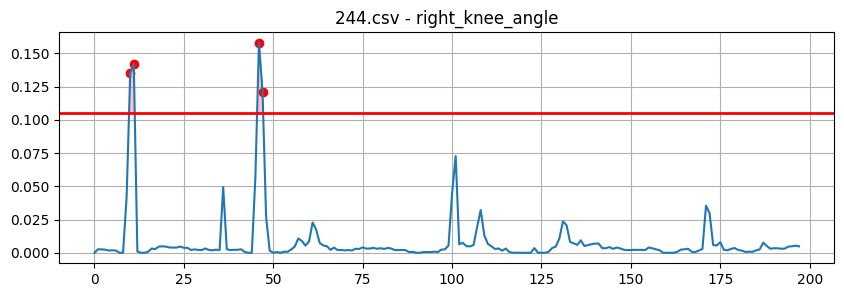

-Patient_number :  264.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 254
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.11049025016418969
-Anomaly points: 1


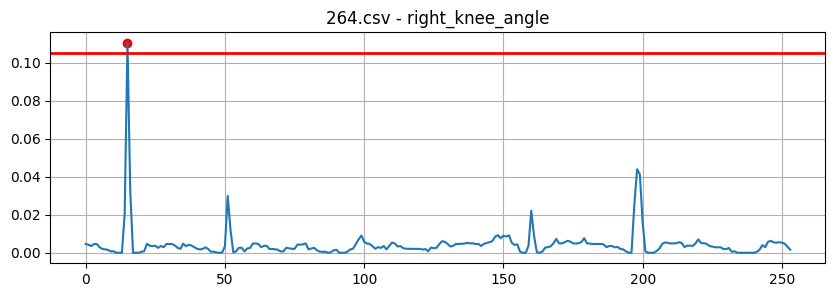

-Patient_number :  275.csv
9/9 [==============================] - 0s 4ms/step
-Data len : 264
-max_anomaly :  0.5537641710463123
-min_anomaly :  0.10986726702963169
-Anomaly Area : 0.961472942909684
-Reconstruction error threshold : 0.5537641710463123
-Anomaly points: 7


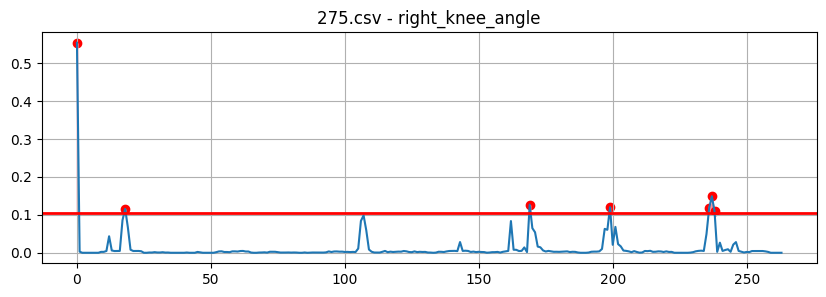

-Patient_number :  278.csv
10/10 [==============================] - 0s 4ms/step
-Data len : 292
-max_anomaly :  0.16066106298511237
-min_anomaly :  0.13069853399073905
-Anomaly Area : 0.4470427243529382
-Reconstruction error threshold : 0.16066106298511237
-Anomaly points: 4


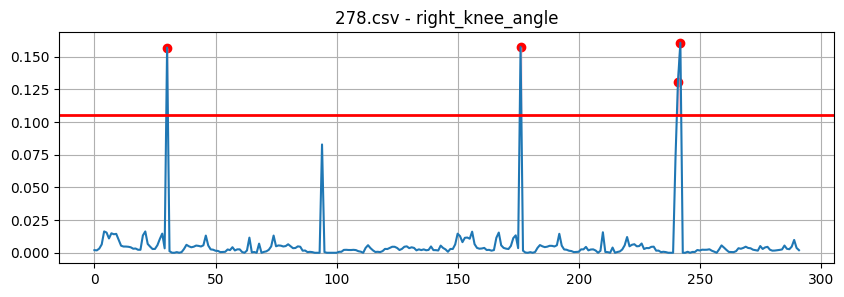

-Patient_number :  28.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 248
-max_anomaly :  0.16196451519978913
-min_anomaly :  0.10732282853308363
-Anomaly Area : 0.29317629097600706
-Reconstruction error threshold : 0.16196451519978913
-Anomaly points: 3


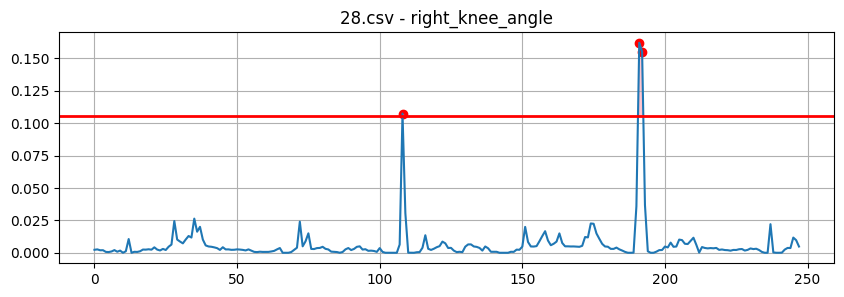

-Patient_number :  284.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 122
-max_anomaly :  0.1294977029038928
-min_anomaly :  0.12224403487059744
-Anomaly Area : 0.1258708688872451
-Reconstruction error threshold : 0.1294977029038928
-Anomaly points: 2


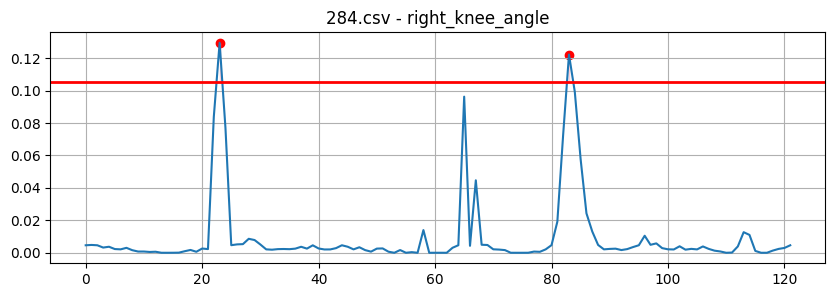

-Patient_number :  285.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 235
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.08735791432990994
-Anomaly points: 0


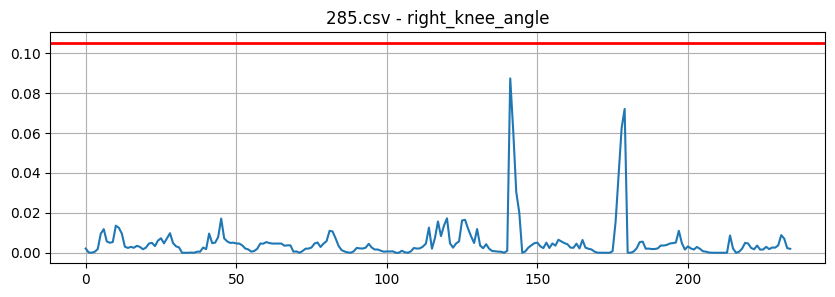

-Patient_number :  286.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 162
-max_anomaly :  0.16204074865539841
-min_anomaly :  0.16081524682371556
-Anomaly Area : 0.161427997739557
-Reconstruction error threshold : 0.16204074865539841
-Anomaly points: 2


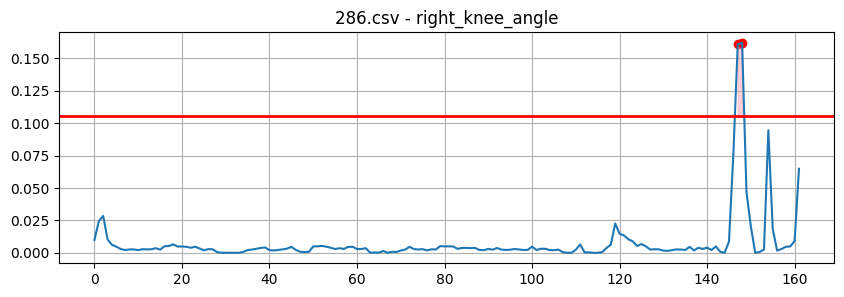

-Patient_number :  287.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 234
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.13810648253510358
-Anomaly points: 1


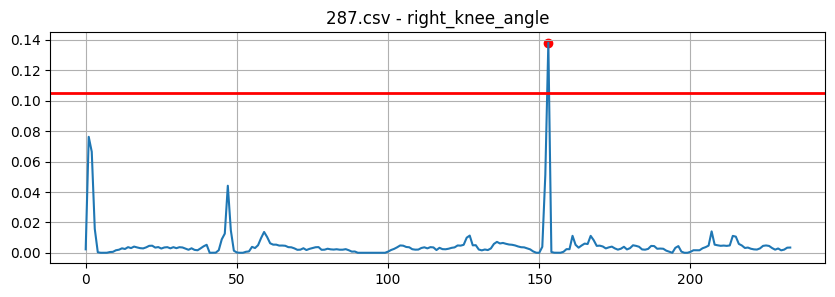

-Patient_number :  298.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 168
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.06208001505271265
-Anomaly points: 0


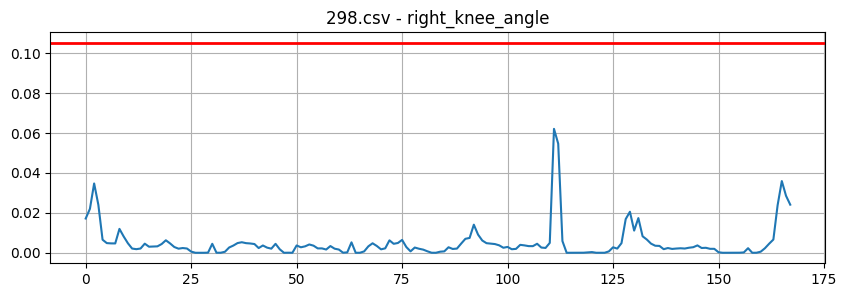

-Patient_number :  333.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 246
-max_anomaly :  0.16149778425378997
-min_anomaly :  0.11322313928658802
-Anomaly Area : 1.1580809952409872
-Reconstruction error threshold : 0.16149778425378997
-Anomaly points: 10


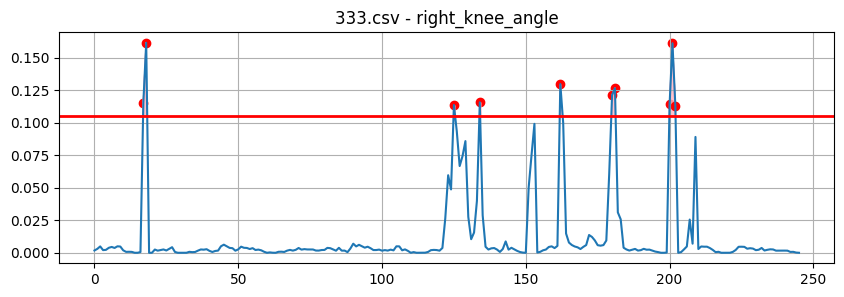

-Patient_number :  337.csv
6/6 [==============================] - 0s 6ms/step
-Data len : 172
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.10408094730862731
-Anomaly points: 0


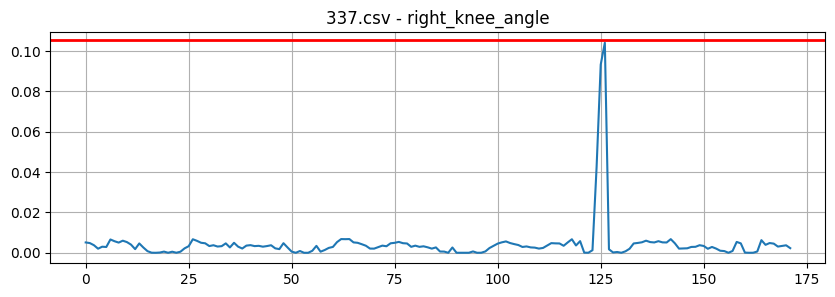

-Patient_number :  338.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 152
-max_anomaly :  0.1842791349402512
-min_anomaly :  0.10651122111653158
-Anomaly Area : 0.7231614327427738
-Reconstruction error threshold : 0.1842791349402512
-Anomaly points: 6


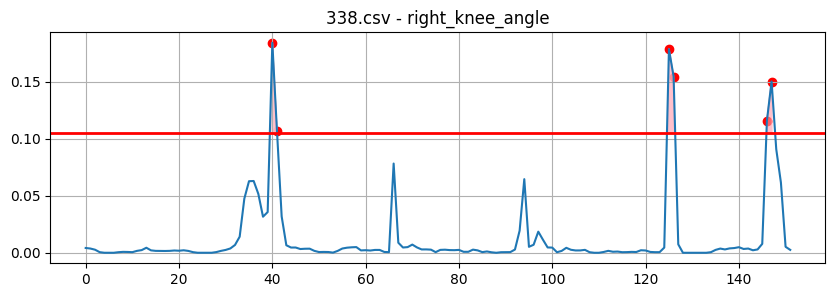

-Patient_number :  340.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 165
-max_anomaly :  0.18445421839304843
-min_anomaly :  0.1106375368036514
-Anomaly Area : 0.7987110021932233
-Reconstruction error threshold : 0.18445421839304843
-Anomaly points: 6


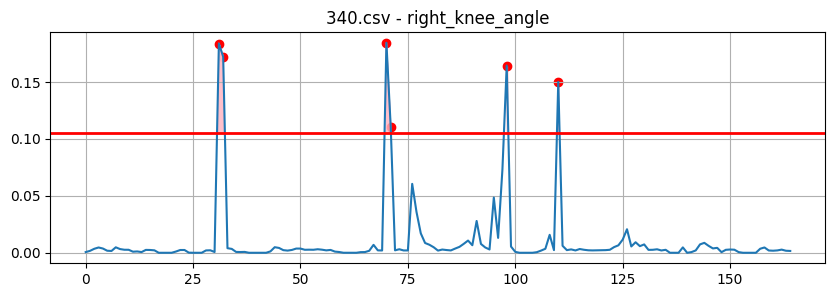

-Patient_number :  341.csv
6/6 [==============================] - 0s 5ms/step
-Data len : 183
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.028849273694410014
-Anomaly points: 0


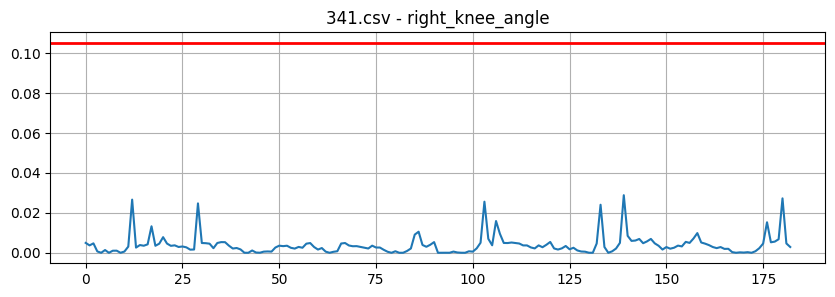

-Patient_number :  344.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 196
-max_anomaly :  0.16058788713178637
-min_anomaly :  0.10563367140117211
-Anomaly Area : 0.45355685030383003
-Reconstruction error threshold : 0.16058788713178637
-Anomaly points: 4


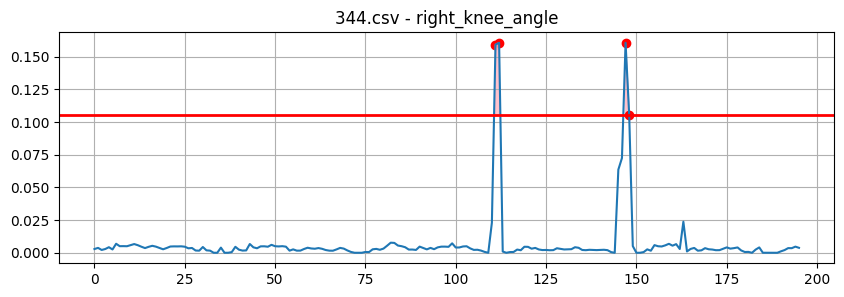

-Patient_number :  354.csv
9/9 [==============================] - 0s 4ms/step
-Data len : 263
-max_anomaly :  0.16180138295043947
-min_anomaly :  0.12855311914335432
-Anomaly Area : 0.4543465353342877
-Reconstruction error threshold : 0.16180138295043947
-Anomaly points: 4


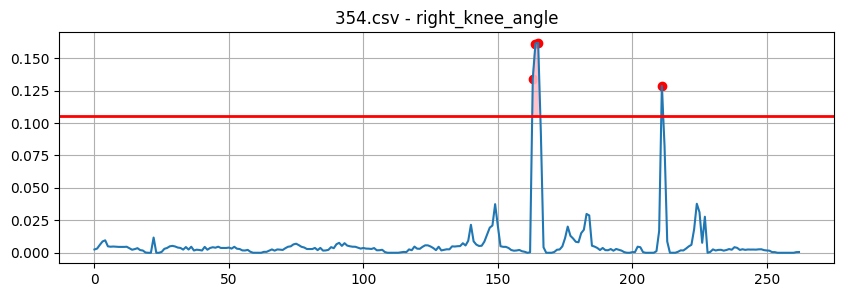

-Patient_number :  356.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 228
-max_anomaly :  0.15961345778755576
-min_anomaly :  0.1485272631936856
-Anomaly Area : 0.46036661852136596
-Reconstruction error threshold : 0.15961345778755576
-Anomaly points: 4


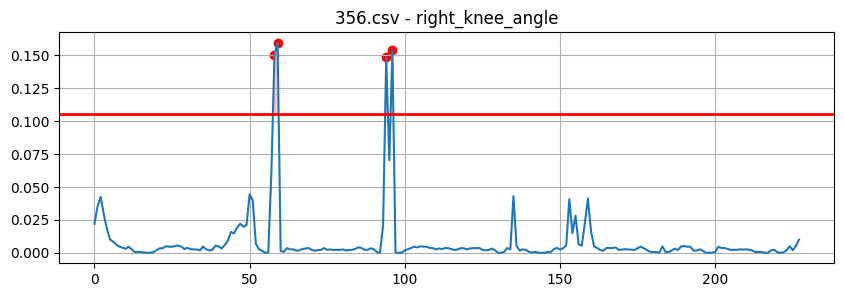

-Patient_number :  358.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 236
-max_anomaly :  0.2506922894218854
-min_anomaly :  0.10637714409962745
-Anomaly Area : 0.1785347167607564
-Reconstruction error threshold : 0.2506922894218854
-Anomaly points: 2


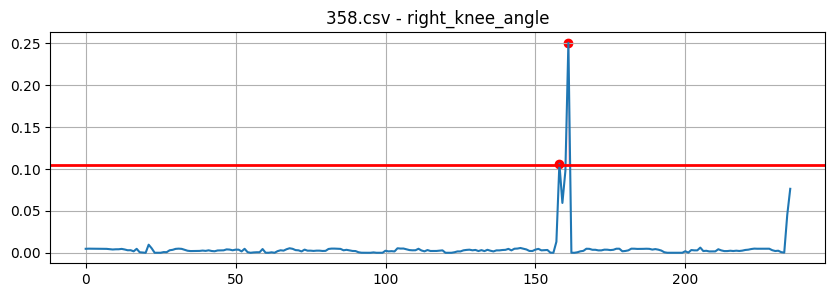

-Patient_number :  36.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 215
-max_anomaly :  0.16181067982255892
-min_anomaly :  0.10762635413488408
-Anomaly Area : 0.1347185169787215
-Reconstruction error threshold : 0.16181067982255892
-Anomaly points: 2


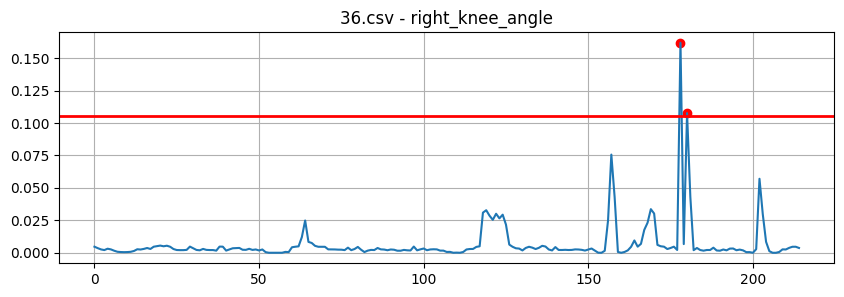

-Patient_number :  360.csv
6/6 [==============================] - 0s 5ms/step
-Data len : 186
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.055281164873101245
-Anomaly points: 0


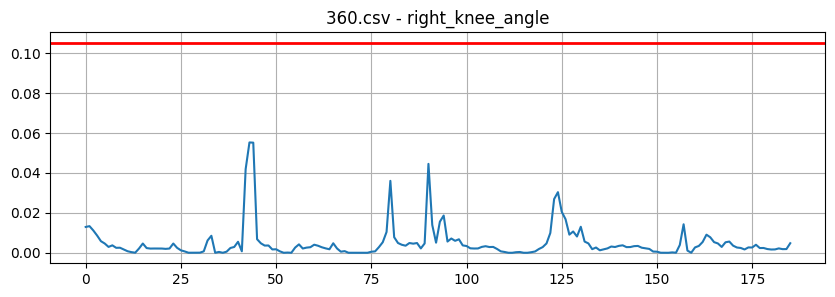

-Patient_number :  364.csv
7/7 [==============================] - 0s 3ms/step
-Data len : 195
-max_anomaly :  0.1584888447333849
-min_anomaly :  0.15493341908741587
-Anomaly Area : 0.3134296020724633
-Reconstruction error threshold : 0.1584888447333849
-Anomaly points: 3


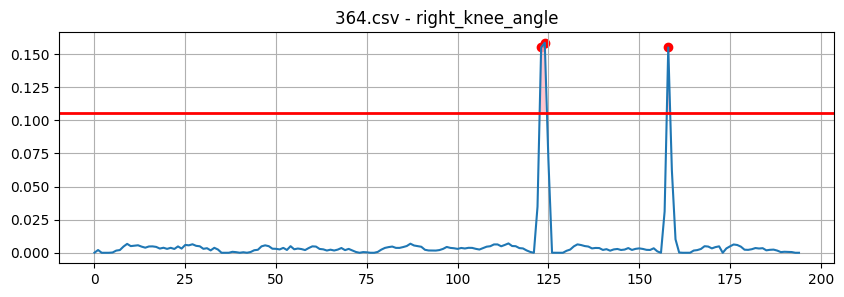

-Patient_number :  365.csv
2/2 [==============================] - 0s 3ms/step
-Data len : 63
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.027940162755265785
-Anomaly points: 0


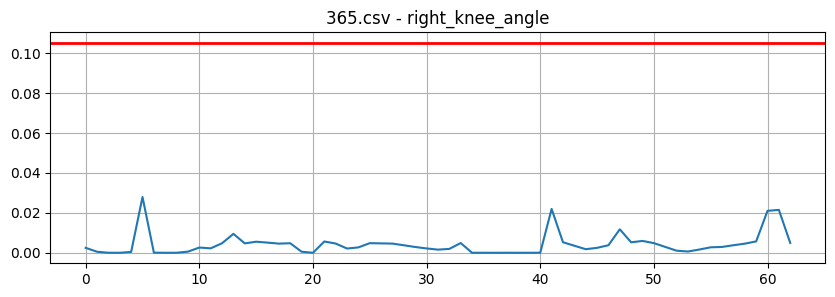

-Patient_number :  367.csv
9/9 [==============================] - 0s 4ms/step
-Data len : 259
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.15248244718415013
-Anomaly points: 1


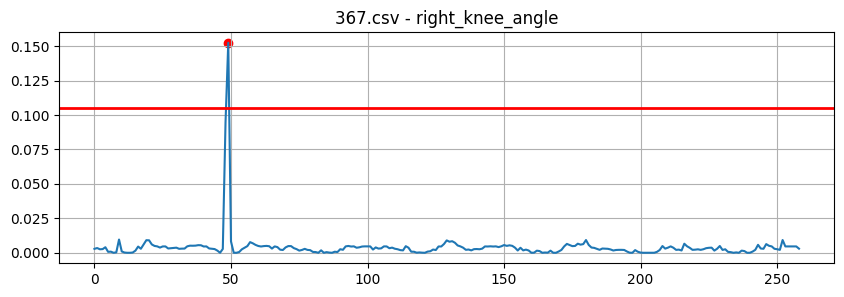

-Patient_number :  369.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 134
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.12143932730395292
-Anomaly points: 1


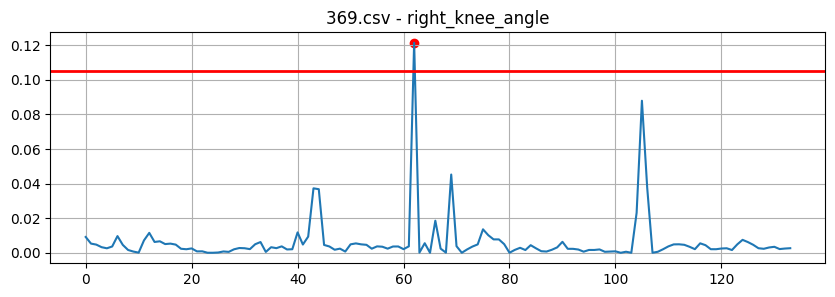

-Patient_number :  391.csv
12/12 [==============================] - 0s 4ms/step
-Data len : 362
-max_anomaly :  0.15145649697847213
-min_anomaly :  0.12660948137091374
-Anomaly Area : 0.7045007779745796
-Reconstruction error threshold : 0.15145649697847213
-Anomaly points: 6


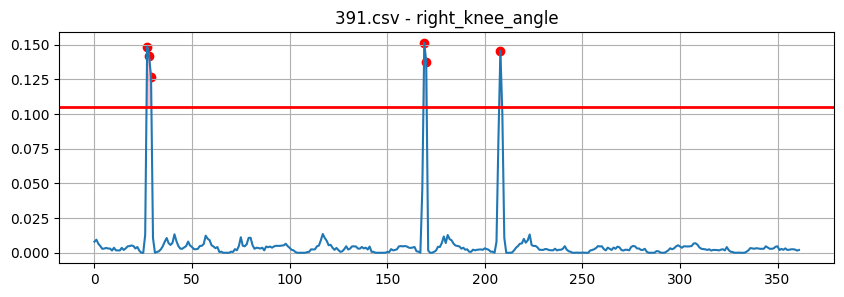

-Patient_number :  398.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 238
-max_anomaly :  0.15817500210105115
-min_anomaly :  0.1495956314226034
-Anomaly Area : 0.3039910158640741
-Reconstruction error threshold : 0.15817500210105115
-Anomaly points: 3


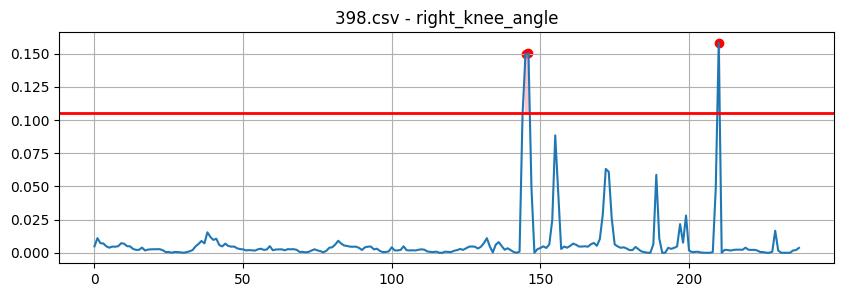

-Patient_number :  400.csv
5/5 [==============================] - 0s 6ms/step
-Data len : 148
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.05621701230259887
-Anomaly points: 0


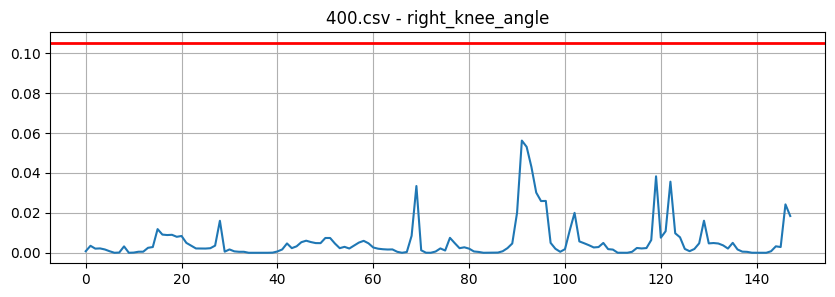

-Patient_number :  412.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 128
-max_anomaly :  0.16031818205602255
-min_anomaly :  0.10749807575684442
-Anomaly Area : 0.1339081289064335
-Reconstruction error threshold : 0.16031818205602255
-Anomaly points: 2


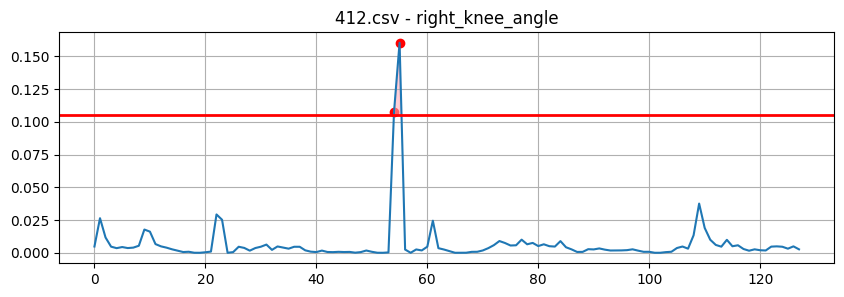

-Patient_number :  414.csv
5/5 [==============================] - 0s 5ms/step
-Data len : 135
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.14165973826864492
-Anomaly points: 1


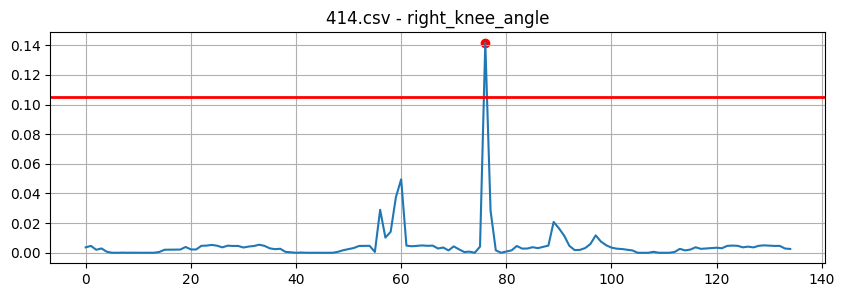

-Patient_number :  420.csv
3/3 [==============================] - 0s 3ms/step
-Data len : 95
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.020379388359587063
-Anomaly points: 0


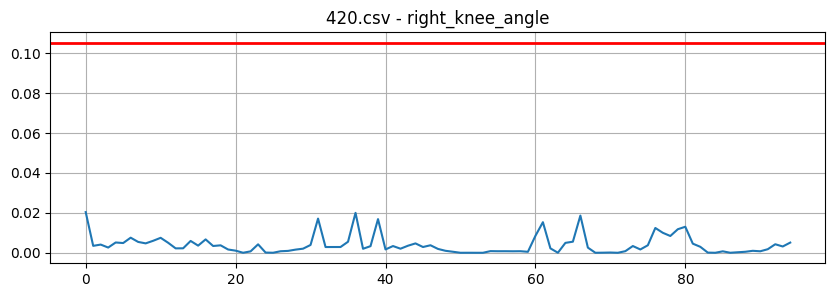

-Patient_number :  423.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 121
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.11374248841650933
-Anomaly points: 1


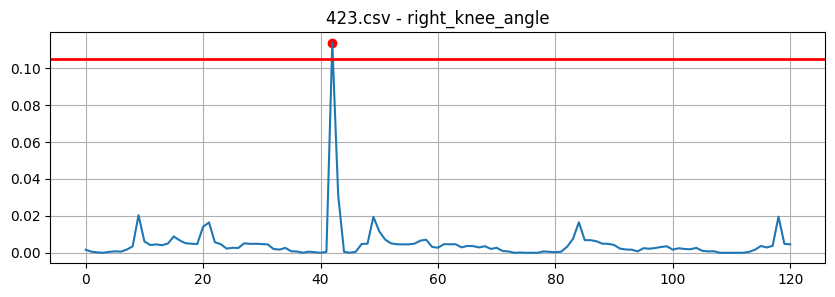

-Patient_number :  428.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 175
-max_anomaly :  0.16204125668938194
-min_anomaly :  0.11704018670121118
-Anomaly Area : 0.5807492403486044
-Reconstruction error threshold : 0.16204125668938194
-Anomaly points: 5


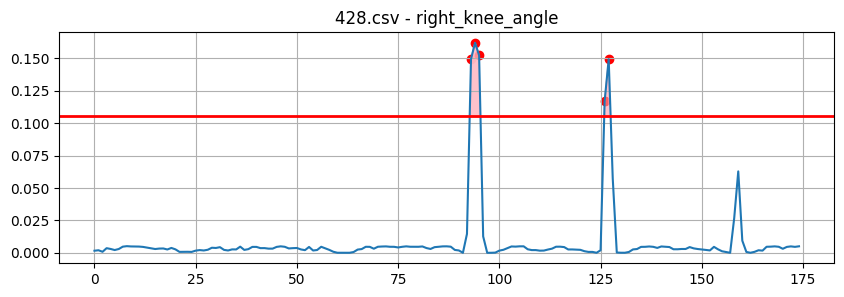

-Patient_number :  43.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 175
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.06778576509530003
-Anomaly points: 0


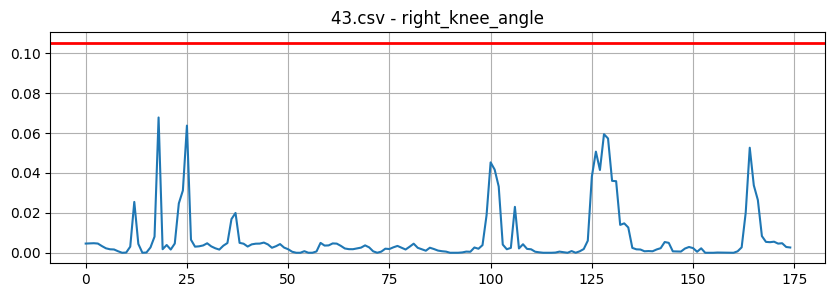

-Patient_number :  432.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 173
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.14498289029298364
-Anomaly points: 1


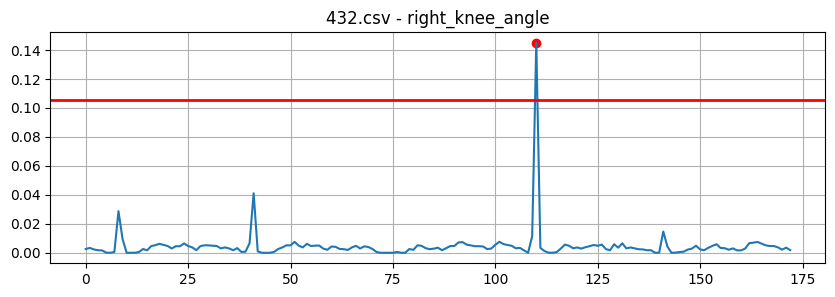

-Patient_number :  436.csv
10/10 [==============================] - 0s 7ms/step
-Data len : 302
-max_anomaly :  0.16197817144436696
-min_anomaly :  0.13388127741756667
-Anomaly Area : 1.0836255316151049
-Reconstruction error threshold : 0.16197817144436696
-Anomaly points: 8


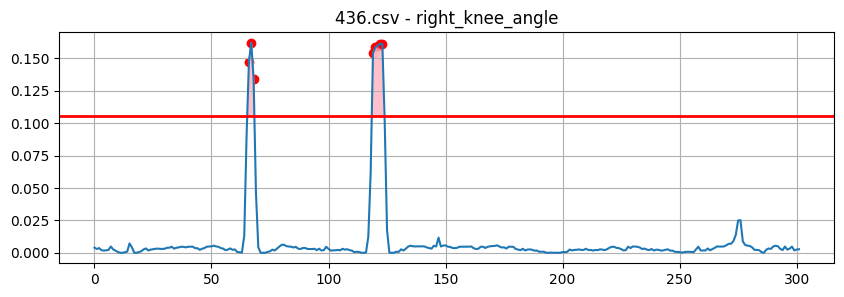

-Patient_number :  445.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 196
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.09281213274222261
-Anomaly points: 0


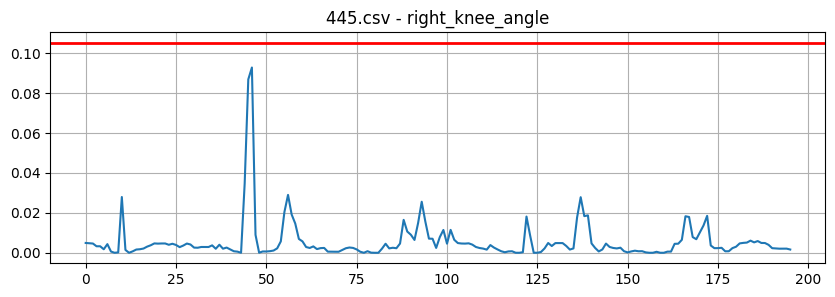

-Patient_number :  56.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 219
-max_anomaly :  0.1490073942253486
-min_anomaly :  0.10966473348695366
-Anomaly Area : 0.6619753504547828
-Reconstruction error threshold : 0.1490073942253486
-Anomaly points: 6


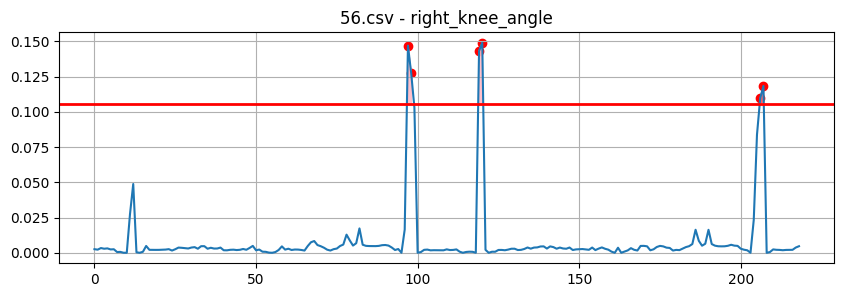

-Patient_number :  61.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 101
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.12169954251245683
-Anomaly points: 1


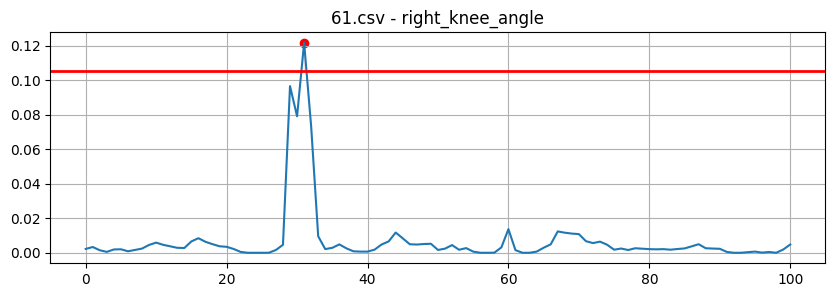

-Patient_number :  84.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 217
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.12913113565766526
-Anomaly points: 1


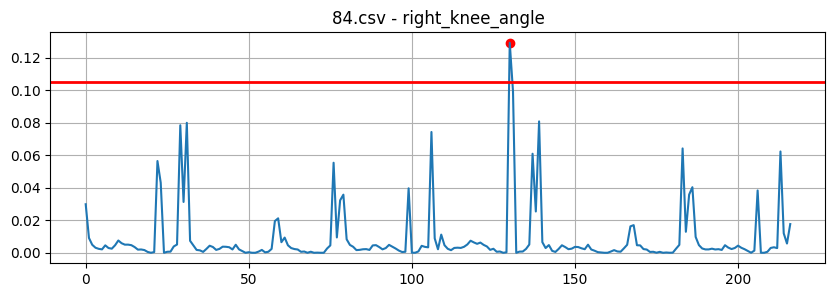

-Patient_number :  85.csv
5/5 [==============================] - 0s 11ms/step
-Data len : 131
-max_anomaly :  0.1578607444679177
-min_anomaly :  0.13158181473188718
-Anomaly Area : 0.44632630664292794
-Reconstruction error threshold : 0.1578607444679177
-Anomaly points: 4


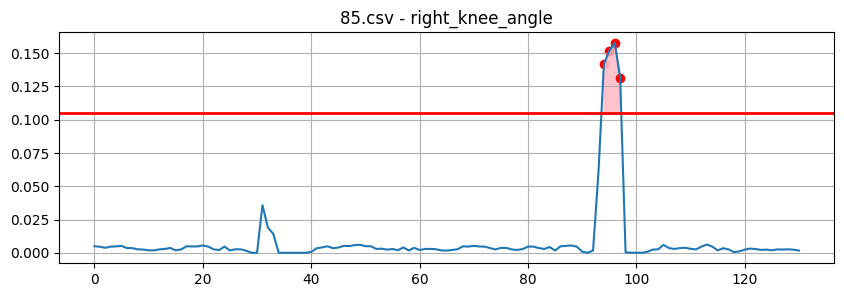

-Patient_number :  91.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 232
-max_anomaly :  0.16088612884858106
-min_anomaly :  0.11483838306969564
-Anomaly Area : 0.6731750862841572
-Reconstruction error threshold : 0.16088612884858106
-Anomaly points: 6


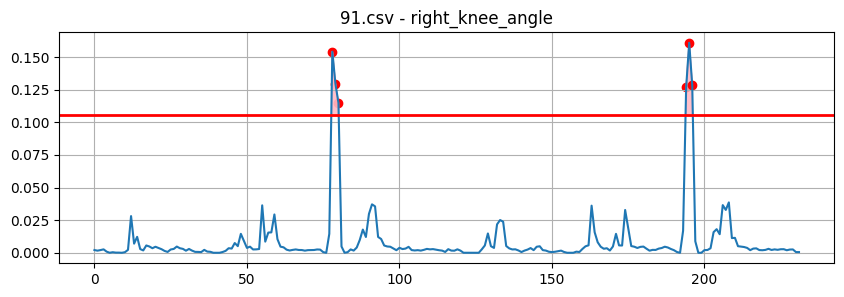

-Patient_number :  97.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 188
-max_anomaly :  0.1501059523318291
-min_anomaly :  0.1312006979709924
-Anomaly Area : 0.14065332515141077
-Reconstruction error threshold : 0.1501059523318291
-Anomaly points: 2


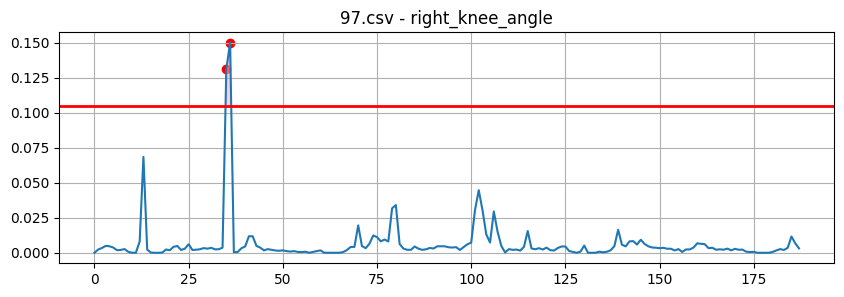

In [20]:
# inte_li = []
# indices = []
data_len = []
total_anomaly = []
total_anomaly_area = []
cont=0

for i in sar_csv:
    print("====================================================================================================")
    path = "test/sar_long_in/"+str(i)
    print("-Patient_number : ",i)
    
    test_sheet = pd.read_csv(path, index_col = 0).dropna()
    test_num = test_sheet[[angle]]
    test_num = scaler.fit_transform(test_num)
    test = np.reshape(test_num,(test_num.shape[0],1,1))
    test_x_predictions = lstm_ae.predict(test)
    test_mae_loss = np.mean(np.power(test_x_predictions - test,2), axis=1).flatten()
    
    real_a_point = test_sheet['tick']
    real_a_point_list = real_a_point.to_numpy().astype(int)
    
    ra = len(real_a_point_list)
    ta=len(test_mae_loss)
    
    if ra == ta:
        print("-Data len :",ta)
    
    data_len.append(ta)

    plt.figure(figsize = (10,3))
    plt.plot(test_mae_loss)
    plt.axhline(y=threshold_ave, color='red', linewidth=2)
    
    red_t = [] # 이상치 갯수 리스트 
    inte_li = []
    indices = []
    data_len = []
    

    red = 0
    
    for j in range(len(real_a_point_list)):
        
        if test_mae_loss[j] >= threshold_ave:
            above_threshold = test_mae_loss >= threshold_ave
            below_threshold = np.logical_not(above_threshold)
            plt.fill_between(np.arange(len(test_mae_loss)), test_mae_loss, threshold_ave, where=above_threshold, color='pink', alpha=0.5) #임계갓 윗 부분
            # plt.fill_betweenx(y=[0,threshold_ave], x1=j, x2=j+1, color='pink') #임계갓 아랫 부분 
            plt.scatter(j, test_mae_loss[j],c='r')
            red = 1
            inte = (test_mae_loss[j])

            inte_li.append(inte) # 이상치 값
            red_t.append(red) # 이상치 갯수 카운트 
            indices.append(j) # 이상치 인덱스 
            total_anomaly.append(inte)
            
    # print("-Anomaly_data : ",inte_li)
    
    if len(red_t) >= 2:
        print("-max_anomaly : ",max(inte_li))
        print("-min_anomaly : ",min(inte_li))

        
    # if len(red_t) <= 10:
    #     print("-중증도 : 1단계")
    # elif len(red_t) >= 10:
    #     print("-중증도 : 2단계")
    # else:
    #     print("-중증도 : 3단계")
    
    if red == 1:
        cont += 1
    
    loss_max = np.max(test_mae_loss)
    anomaly_area = np.trapz(inte_li)
    # total_anomaly_area.append(anomaly_area)
    
    plt.title(i + " - " + angle)
    plt.grid()
    name = i[:-4]
    # plt.savefig(name)
    
    print("-Anomaly Area :", anomaly_area)
    print(f'-Reconstruction error threshold : {loss_max}')
    print("-Anomaly points:",len(red_t))
    
    
    plt.show()


In [40]:
print("이상탐지 환자 수 : ",cont)

이상탐지 환자 수 :  49


=========================================================

In [175]:
# countt = 0

# for i in data_len:
#     if i <= 63:
#         print(i)
#         countt+=1
        
# print(countt)

In [174]:
# print("평균  : ", np.mean(data_len))
# print("최대  : ", np.max(data_len)) # patient_number :  391.csv
# print("최소  : ", np.min(data_len)) # patient_number :  365.csv
# print("분산  : ", np.var(data_len))
# print("표준편차 : ", np.std(data_len))
# print("")

# Nomal TEST

In [21]:
test_num = [23, 24, 25]

14/14 [==============================] - 0s 4ms/step
433


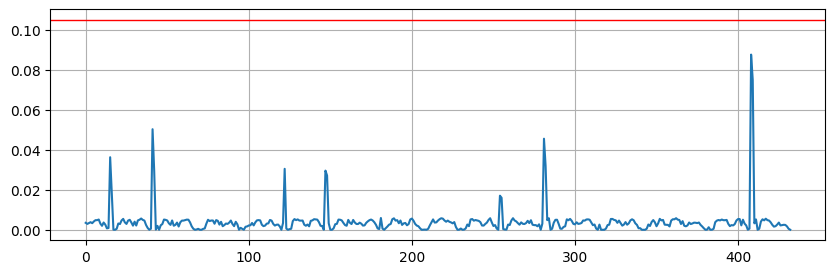

13/13 [==============================] - 0s 4ms/step
397


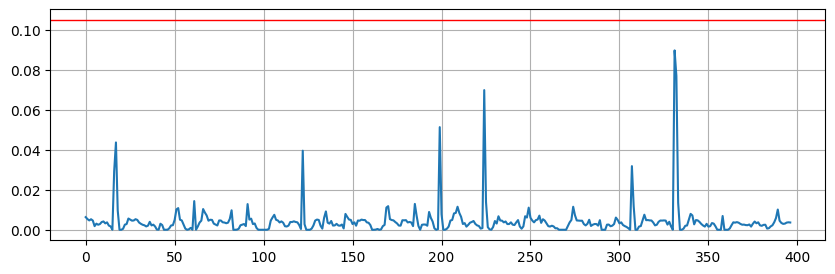

13/13 [==============================] - 0s 4ms/step
405


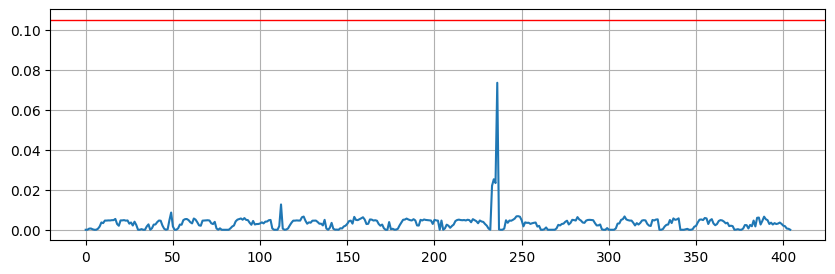

In [22]:
for i in test_num:
    number_num = number[number["num"]== i].dropna()
    number_num = number_num[[angle]]
    # number_num
    number_num = scaler.fit_transform(number_num)
    number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    test_no_x_predictions= lstm_ae.predict(number_num)
    test_no_mae_loss = np.mean(np.power(test_no_x_predictions - number_num,2), axis=1).flatten()
    print(len(test_no_mae_loss))
    
    real_a_point_list = len(test_no_mae_loss)
    # real_a_point_list = real_a_point.to_numpy().astype(int)
    
    plt.figure(figsize = (10,3))
    plt.plot(test_no_mae_loss)
    plt.axhline(y=threshold_ave, color='red', linewidth=1)
    plt.grid()
    
    for j in range (real_a_point_list) :
        if test_no_mae_loss[j] >= threshold_ave:
            plt.scatter(j, test_no_mae_loss[j],c='r')         
    
    
    
    plt.show()
    
#     test_no_mae_loss_max = np.max(test_no_mae_loss)
#     print(f'Reconstruction error threshold: {test_no_mae_loss_max}')

# 실험 ( 데이터 분석 )

# test2222

In [ ]:
# plt.figure(figsize = (20,3))
# plt.grid()
# plt.plot(inte_li)
# # sns.histplot(data = inte_li, color="red",stat = "probability",alpha=0.7)

In [ ]:
#임계값 기준 색칠
# x = np.linspace(0, 10, 100)
# y = np.sin(x)

# fig, ax = plt.subplots()
# ax.plot(x, y, label='sin(x)')
# ax.set_ylim(-2, 2)

# # 임계값 지정
# threshold = 0.5

# # y축을 넘는 부분 찾기
# above_threshold = y > threshold
# # print(above_threshold) #데이터의 형태는 boolen 
# below_threshold = np.logical_not(above_threshold)

# # y축을 넘는 부분을 빨간색으로 채우기
# ax.fill_between(x, y, threshold, where=above_threshold, color='red', alpha=0.5)
# # ax.fill_between(x, threshold, -2, where=below_threshold, color='blue', alpha=0.5)

# ax.legend()
# plt.show()